1. Use https://www.nist.gov/node/1298471/emnist-dataset EMNIST ByClass datasets from scikit-learn
2. Use matlab file version
3. Use pandas to store and view data and perform descriptive statistics
4. Use pandas groupby to view data by classes, digits, letters
5. Display images of digits
6. Demonstrate pre-processing steps of scaling, gray-scaling, centering (sample, feature etc)
7. Use image augmentation to generate larger training dataset (flip, rotate, translate, shear, noise etc)
8. Splitting of train/test datasets
9. Logistic Regression modelling using scikit-learn
10. Model performance results - precision, recall, F1 Score, ROC Curve
11. Print and display confusion matrix
12. Write report to explain process and results

In [9]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import tensorflow as tf
import keras
import sklearn
from sklearn.model_selection import train_test_split

In [3]:
'''load dataset'''
from scipy.io import loadmat
emnist = loadmat('C:/Users/yanhui/Documents/Jelah/Acronis/matlab/emnist-byclass.mat')
emnist.keys()

dict_keys(['__header__', '__version__', '__globals__', 'dataset'])

In [4]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [5]:
data = emnist['dataset']
#row form

In [6]:
'''load data'''
#since the data is already divided into training and testing sets (as mentioned in the paper),
#load them separately into training and testing sets

x_train = data['train'][0,0]['images'][0,0]
y_train = data['train'][0,0]['labels'][0,0]
x_test = data['test'][0,0]['images'][0,0]
y_test = data['test'][0,0]['labels'][0,0]

((697932, 784), (697932, 1), (116323, 784), (116323, 1))

In [7]:
'''convert input images from numpy array to df'''

def convert_to_df(x_train,  y_train, x_test, y_test): #row pd
    train_row = pd.DataFrame(x_train)
    test_row = pd.DataFrame(x_test)
    train_label_row = pd.DataFrame(y_train)
    test_label_row = pd.DataFrame(y_test)
    return train_row, train_label_row, test_row, test_label_row
#df form
train_row, train_label_row, test_row, test_label_row = convert_to_df(x_train, y_train, x_test, y_test)

In [10]:
'''descriptive statistics'''
def desc_stat(train,test):
    train_stat = train.describe()
    test_stat = train.describe()
    
    return train_stat, test_stat

In [11]:
'''insert classes row to training and testing datasets for groupby'''
train_comb = np.append(train_row, train_label_row, axis=1)
test_comb = np.append(test_row, test_label_row, axis=1)

In [12]:
'''groupby training data'''
#group the train data into classes and return the indices of images pertaining to each class
def groupby_train(train,train_label_row):
    A = np.array(train_label_row).T
    classes = A[0] 
    group = train.groupby(classes).groups
    
    return group

def groupby_test(test,test_label_row):
    A = np.array(test_label_row).T
    classes = A[0] 
    group = test.groupby(classes).groups
    
    return group

    

In [13]:
#indices of images sorted by classes
train_grp = groupby_train(train_row, train_label_row)
test_grp = groupby_test(test_row, test_label_row)

len(train_grp), len(test_grp)

(62, 62)

In [12]:
'''reshape arrays'''
def reshape_arr(train, test):
    sq_train = train.reshape(-1,28,28)
    sq_test = test.reshape(-1,28,28)
    return sq_train, sq_test

#the loaded arrays are not in the proper orientation
Xtrain, Xtest = reshape_arr(x_train, x_test)

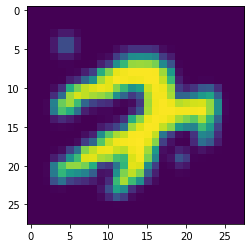

In [14]:
#check orientation of images loaded
plt.imshow(Xtrain[9])

In [15]:
#re-orient the images
def rot_flip(train,test):
    sq_flipped_train = []
    sq_flipped_test = []
    for i in range(len(train)):
        sq_rot_train = np.rot90(train[i])
        sq_flip_train = np.flipud(sq_rot_train)
        sq_flipped_train.append(sq_flip_train)
    sq_flipped_train = np.array(sq_flipped_train)
    
    for j in range(len(test)):
        sq_rot_test = np.rot90(test[j])
        sq_flip_test = np.flipud(sq_rot_test)
        sq_flipped_test.append(sq_flip_test)
    sq_flipped_test = np.array(sq_flipped_test)
        
    return sq_flipped_train, sq_flipped_test
Xtrain, Xtest = rot_flip(Xtrain,Xtest)

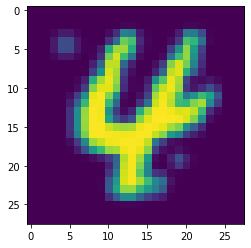

In [17]:
#check orientation of images after re-orientation
plt.imshow(Xtrain[9])

In [62]:
'''display images of the first digits'''
def display_train(train):
    plt.figure(figsize=[15,15])
    for i in range(10):
        plt.subplot(10,10,i+1)
        train_index = train_grp[i][0]
        plt.imshow(train[train_index])
        plt.gray()
        
def display_test(test):
    plt.figure(figsize=[15,15])
    for j in range(10):
        plt.subplot(10,10,j+1)
        test_index = test_grp[j][0]
        plt.imshow(test[test_index])
        plt.gray()
        
display_train(Xtrain)
display_test(Xtest)

In [ ]:
'''data preprocessing'''

In [17]:
'''data normalization'''
#normalize the input data to [0,1] range
def normalize_img(train,test):
    train_norm = train/255
    test_norm = test/255
    
    return train_norm, test_norm

Xtrain, Xtest = normalize_img(Xtrain,Xtest)

In [22]:
'''label conversion to one-hot vectors'''
#convert the y_train adn y_test to one-hot vectors
def one_hot_label(train,test):
    train_label = to_categorical(train)
    test_label = to_categorical(test)
    
    return train_label, test_label
Ytrain, Ytest = one_hot_label(y_train, y_test)

In [25]:
'''standardize the images'''
def standardize_img(train, test):
    #calculate mean and standard deviation
    m = train.mean()
    s = train.std()
    #center and standardize datasets:
    train_std = (train - m)/s
    test_std = (test - m)/s
    #return standardized images
    return train_std, test_std

Xtrain, Xtest = standardize_img(Xtrain, Xtest)

((697932, 28, 28), (116323, 28, 28))

In [ ]:
'''save np arrays to binary files for fast loading'''
np.save('C:/Users/yanhui/Documents/Jelah/Acronis/Xtrain', Xtrain)
np.save('C:/Users/yanhui/Documents/Jelah/Acronis/Xtest', Xtest)
np.save('C:/Users/yanhui/Documents/Jelah/Acronis/Y_train', Ytrain)
np.save('C:/Users/yanhui/Documents/Jelah/Acronis/Y_test', Ytest)